In [1]:
#importing necessary libraries for sentiment analysis
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

# Data Exploration

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.shape

(50000, 2)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.loc[3, "review"]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [6]:
df.loc[3, "sentiment"]

'negative'

In [7]:
df.loc[1495, "review"]

"This movie is terrible, it was so difficult to believe that Katie became a heartfelt teenager with the power to save the pity Chinese people, the movie didn't show any convincing argument to prove that. And the rest of the plot didn't make any effort to show us more than a cheap common sense... <br /><br />The plot is ridiculous and the only thing we can extract from it is that it demonstrate how arrogant a human can be. Katie must have inherited her arrogance from her mother, the most annoying character I have seen for a long time. <br /><br />The acting and scenery were OK, but the plot ruins everything, full of cheap clichés and hypocritical scenes, I expect not to see this movie again in my life. Skip this one!"

In [9]:
df.loc[1495, "sentiment"]

'negative'

### Bar plot of 'Sentiment'

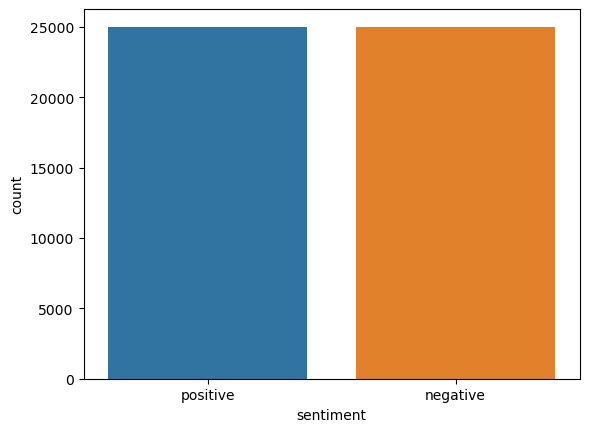

In [10]:
sns.countplot(x="sentiment", data=df)
plt.show()

In [11]:
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### Find the length of each 'review'

In [12]:
df["len"] = df["review"].apply(len)

In [13]:
df["len"].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: len, dtype: float64

### Plot the histogram of 'len'

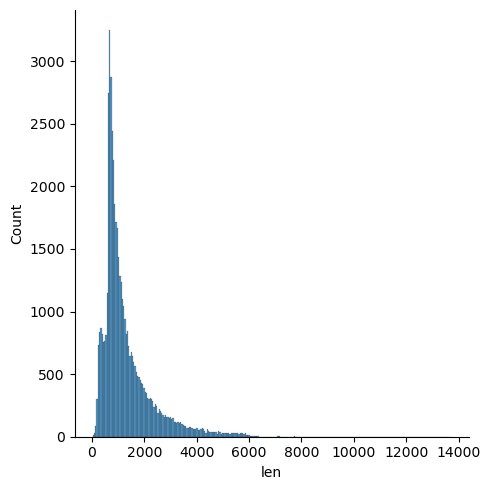

In [14]:
sns.displot(df["len"])
plt.show()

### Plot the distribution of 'len' for different 'Sentiment' types

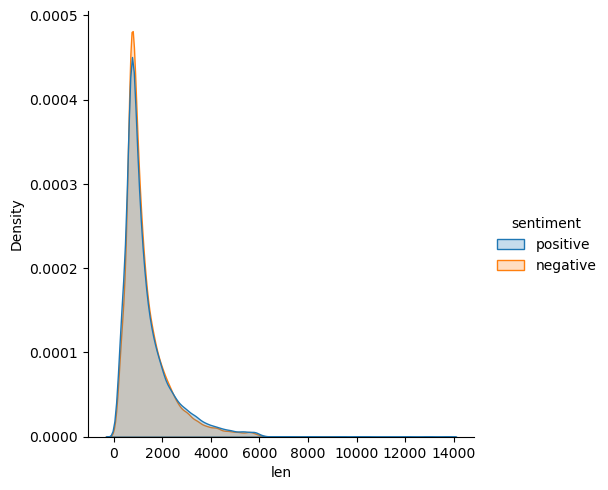

In [16]:
sns.displot(data=df, x="len", hue="sentiment", kind="kde", fill=True)
plt.show()

# Tokenization

In [18]:
data = df[["review", "sentiment"]]

In [19]:
data.loc[3, "review"]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [20]:
sent_tokenize(data.loc[3,"review"])

["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama!",
 'As a drama the movie is watchable.',
 'Parents are divorcing & arguing like in real life.',
 'And then we have Jake with his closet which totally ruins all the film!',
 'I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs.',
 'As for the shots with Jake: just ignore them.']

In [21]:
data.loc[1495, "review"]

"This movie is terrible, it was so difficult to believe that Katie became a heartfelt teenager with the power to save the pity Chinese people, the movie didn't show any convincing argument to prove that. And the rest of the plot didn't make any effort to show us more than a cheap common sense... <br /><br />The plot is ridiculous and the only thing we can extract from it is that it demonstrate how arrogant a human can be. Katie must have inherited her arrogance from her mother, the most annoying character I have seen for a long time. <br /><br />The acting and scenery were OK, but the plot ruins everything, full of cheap clichés and hypocritical scenes, I expect not to see this movie again in my life. Skip this one!"

In [22]:
sent_tokenize(data.loc[1495, "review"])

["This movie is terrible, it was so difficult to believe that Katie became a heartfelt teenager with the power to save the pity Chinese people, the movie didn't show any convincing argument to prove that.",
 "And the rest of the plot didn't make any effort to show us more than a cheap common sense... <br /><br />The plot is ridiculous and the only thing we can extract from it is that it demonstrate how arrogant a human can be.",
 'Katie must have inherited her arrogance from her mother, the most annoying character I have seen for a long time.',
 '<br /><br />The acting and scenery were OK, but the plot ruins everything, full of cheap clichés and hypocritical scenes, I expect not to see this movie again in my life.',
 'Skip this one!']

In [23]:
word_tokenize(data.loc[13, "review"])

['The',
 'cast',
 'played',
 'Shakespeare.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'Shakespeare',
 'lost.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'I',
 'appreciate',
 'that',
 'this',
 'is',
 'trying',
 'to',
 'bring',
 'Shakespeare',
 'to',
 'the',
 'masses',
 ',',
 'but',
 'why',
 'ruin',
 'something',
 'so',
 'good.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'Is',
 'it',
 'because',
 "'The",
 'Scottish',
 'Play',
 "'",
 'is',
 'my',
 'favorite',
 'Shakespeare',
 '?',
 'I',
 'do',
 'not',
 'know',
 '.',
 'What',
 'I',
 'do',
 'know',
 'is',
 'that',
 'a',
 'certain',
 'Rev',
 'Bowdler',
 '(',
 'hence',
 'bowdlerization',
 ')',
 'tried',
 'to',
 'do',
 'something',
 'similar',
 'in',
 'the',
 'Victorian',
 'era.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'In',
 'other',
 'words',
 ',',
 'you',
 'can',
 'not',
 'improve',
 'perfection.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'I',
 'have',
 'no',
 'more',
 'to',
 'write',
 'but'

In [24]:
word_tokenize(data.loc[1495, "review"])

['This',
 'movie',
 'is',
 'terrible',
 ',',
 'it',
 'was',
 'so',
 'difficult',
 'to',
 'believe',
 'that',
 'Katie',
 'became',
 'a',
 'heartfelt',
 'teenager',
 'with',
 'the',
 'power',
 'to',
 'save',
 'the',
 'pity',
 'Chinese',
 'people',
 ',',
 'the',
 'movie',
 'did',
 "n't",
 'show',
 'any',
 'convincing',
 'argument',
 'to',
 'prove',
 'that',
 '.',
 'And',
 'the',
 'rest',
 'of',
 'the',
 'plot',
 'did',
 "n't",
 'make',
 'any',
 'effort',
 'to',
 'show',
 'us',
 'more',
 'than',
 'a',
 'cheap',
 'common',
 'sense',
 '...',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'plot',
 'is',
 'ridiculous',
 'and',
 'the',
 'only',
 'thing',
 'we',
 'can',
 'extract',
 'from',
 'it',
 'is',
 'that',
 'it',
 'demonstrate',
 'how',
 'arrogant',
 'a',
 'human',
 'can',
 'be',
 '.',
 'Katie',
 'must',
 'have',
 'inherited',
 'her',
 'arrogance',
 'from',
 'her',
 'mother',
 ',',
 'the',
 'most',
 'annoying',
 'character',
 'I',
 'have',
 'seen',
 'for',
 'a',
 'long',
 'tim

### Convert text to lower case

In [25]:
reviews = list(data["review"])

In [26]:
len(reviews)

50000

In [27]:
reviews[3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [28]:
reviews[1495]

"This movie is terrible, it was so difficult to believe that Katie became a heartfelt teenager with the power to save the pity Chinese people, the movie didn't show any convincing argument to prove that. And the rest of the plot didn't make any effort to show us more than a cheap common sense... <br /><br />The plot is ridiculous and the only thing we can extract from it is that it demonstrate how arrogant a human can be. Katie must have inherited her arrogance from her mother, the most annoying character I have seen for a long time. <br /><br />The acting and scenery were OK, but the plot ruins everything, full of cheap clichés and hypocritical scenes, I expect not to see this movie again in my life. Skip this one!"

In [29]:
reviews[1495].lower()

"this movie is terrible, it was so difficult to believe that katie became a heartfelt teenager with the power to save the pity chinese people, the movie didn't show any convincing argument to prove that. and the rest of the plot didn't make any effort to show us more than a cheap common sense... <br /><br />the plot is ridiculous and the only thing we can extract from it is that it demonstrate how arrogant a human can be. katie must have inherited her arrogance from her mother, the most annoying character i have seen for a long time. <br /><br />the acting and scenery were ok, but the plot ruins everything, full of cheap clichés and hypocritical scenes, i expect not to see this movie again in my life. skip this one!"

In [30]:
reviews_lower = [r.lower() for r in reviews]

In [32]:
reviews_lower[3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [33]:
reviews_lower = []
for r in reviews:
    reviews_lower.append(r.lower())

In [34]:
tokens = [word_tokenize(r) for r in reviews_lower]

In [35]:
tokens[3]

['basically',
 'there',
 "'s",
 'a',
 'family',
 'where',
 'a',
 'little',
 'boy',
 '(',
 'jake',
 ')',
 'thinks',
 'there',
 "'s",
 'a',
 'zombie',
 'in',
 'his',
 'closet',
 '&',
 'his',
 'parents',
 'are',
 'fighting',
 'all',
 'the',
 'time.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'this',
 'movie',
 'is',
 'slower',
 'than',
 'a',
 'soap',
 'opera',
 '...',
 'and',
 'suddenly',
 ',',
 'jake',
 'decides',
 'to',
 'become',
 'rambo',
 'and',
 'kill',
 'the',
 'zombie.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'ok',
 ',',
 'first',
 'of',
 'all',
 'when',
 'you',
 "'re",
 'going',
 'to',
 'make',
 'a',
 'film',
 'you',
 'must',
 'decide',
 'if',
 'its',
 'a',
 'thriller',
 'or',
 'a',
 'drama',
 '!',
 'as',
 'a',
 'drama',
 'the',
 'movie',
 'is',
 'watchable',
 '.',
 'parents',
 'are',
 'divorcing',
 '&',
 'arguing',
 'like',
 'in',
 'real',
 'life',
 '.',
 'and',
 'then',
 'we',
 'have',
 'jake',
 'with',
 'his',
 'closet',
 'which',
 'totally',
 'ruins',
 'a

In [36]:
tokens[1495]

['this',
 'movie',
 'is',
 'terrible',
 ',',
 'it',
 'was',
 'so',
 'difficult',
 'to',
 'believe',
 'that',
 'katie',
 'became',
 'a',
 'heartfelt',
 'teenager',
 'with',
 'the',
 'power',
 'to',
 'save',
 'the',
 'pity',
 'chinese',
 'people',
 ',',
 'the',
 'movie',
 'did',
 "n't",
 'show',
 'any',
 'convincing',
 'argument',
 'to',
 'prove',
 'that',
 '.',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'plot',
 'did',
 "n't",
 'make',
 'any',
 'effort',
 'to',
 'show',
 'us',
 'more',
 'than',
 'a',
 'cheap',
 'common',
 'sense',
 '...',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'the',
 'plot',
 'is',
 'ridiculous',
 'and',
 'the',
 'only',
 'thing',
 'we',
 'can',
 'extract',
 'from',
 'it',
 'is',
 'that',
 'it',
 'demonstrate',
 'how',
 'arrogant',
 'a',
 'human',
 'can',
 'be',
 '.',
 'katie',
 'must',
 'have',
 'inherited',
 'her',
 'arrogance',
 'from',
 'her',
 'mother',
 ',',
 'the',
 'most',
 'annoying',
 'character',
 'i',
 'have',
 'seen',
 'for',
 'a',
 'long',
 'tim

In [37]:
len(tokens)

50000

# Stopwords removal

In [38]:
sw = stopwords.words('english')

In [39]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
tokens = [[word for word in t if word not in sw] for t in tokens]

In [41]:
tokens[3]

['basically',
 "'s",
 'family',
 'little',
 'boy',
 '(',
 'jake',
 ')',
 'thinks',
 "'s",
 'zombie',
 'closet',
 '&',
 'parents',
 'fighting',
 'time.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'movie',
 'slower',
 'soap',
 'opera',
 '...',
 'suddenly',
 ',',
 'jake',
 'decides',
 'become',
 'rambo',
 'kill',
 'zombie.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'ok',
 ',',
 'first',
 "'re",
 'going',
 'make',
 'film',
 'must',
 'decide',
 'thriller',
 'drama',
 '!',
 'drama',
 'movie',
 'watchable',
 '.',
 'parents',
 'divorcing',
 '&',
 'arguing',
 'like',
 'real',
 'life',
 '.',
 'jake',
 'closet',
 'totally',
 'ruins',
 'film',
 '!',
 'expected',
 'see',
 'boogeyman',
 'similar',
 'movie',
 ',',
 'instead',
 'watched',
 'drama',
 'meaningless',
 'thriller',
 'spots.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 '3',
 '10',
 'well',
 'playing',
 'parents',
 '&',
 'descent',
 'dialogs',
 '.',
 'shots',
 'jake',
 ':',
 'ignore',
 '.']

In [42]:
reviews[3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [43]:
tokens[1495]

['movie',
 'terrible',
 ',',
 'difficult',
 'believe',
 'katie',
 'became',
 'heartfelt',
 'teenager',
 'power',
 'save',
 'pity',
 'chinese',
 'people',
 ',',
 'movie',
 "n't",
 'show',
 'convincing',
 'argument',
 'prove',
 '.',
 'rest',
 'plot',
 "n't",
 'make',
 'effort',
 'show',
 'us',
 'cheap',
 'common',
 'sense',
 '...',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'plot',
 'ridiculous',
 'thing',
 'extract',
 'demonstrate',
 'arrogant',
 'human',
 '.',
 'katie',
 'must',
 'inherited',
 'arrogance',
 'mother',
 ',',
 'annoying',
 'character',
 'seen',
 'long',
 'time',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'acting',
 'scenery',
 'ok',
 ',',
 'plot',
 'ruins',
 'everything',
 ',',
 'full',
 'cheap',
 'clichés',
 'hypocritical',
 'scenes',
 ',',
 'expect',
 'see',
 'movie',
 'life',
 '.',
 'skip',
 'one',
 '!']

In [44]:
reviews[1495]

"This movie is terrible, it was so difficult to believe that Katie became a heartfelt teenager with the power to save the pity Chinese people, the movie didn't show any convincing argument to prove that. And the rest of the plot didn't make any effort to show us more than a cheap common sense... <br /><br />The plot is ridiculous and the only thing we can extract from it is that it demonstrate how arrogant a human can be. Katie must have inherited her arrogance from her mother, the most annoying character I have seen for a long time. <br /><br />The acting and scenery were OK, but the plot ruins everything, full of cheap clichés and hypocritical scenes, I expect not to see this movie again in my life. Skip this one!"

### Remove punctuations

In [45]:
tokenizer = RegexpTokenizer(r'\w+')

In [46]:
tokenizer.tokenize("wasn't")

['wasn', 't']

In [47]:
t = tokenizer.tokenize("wasn't")

In [48]:
"".join(t)

'wasnt'

In [49]:
tokenizer.tokenize(":")

[]

In [50]:
tokens = [["".join(tokenizer.tokenize(word)) for word in t
           if len(tokenizer.tokenize(word))>0] for t in tokens]

In [51]:
tokens[3]

['basically',
 's',
 'family',
 'little',
 'boy',
 'jake',
 'thinks',
 's',
 'zombie',
 'closet',
 'parents',
 'fighting',
 'time',
 'br',
 'br',
 'movie',
 'slower',
 'soap',
 'opera',
 'suddenly',
 'jake',
 'decides',
 'become',
 'rambo',
 'kill',
 'zombie',
 'br',
 'br',
 'ok',
 'first',
 're',
 'going',
 'make',
 'film',
 'must',
 'decide',
 'thriller',
 'drama',
 'drama',
 'movie',
 'watchable',
 'parents',
 'divorcing',
 'arguing',
 'like',
 'real',
 'life',
 'jake',
 'closet',
 'totally',
 'ruins',
 'film',
 'expected',
 'see',
 'boogeyman',
 'similar',
 'movie',
 'instead',
 'watched',
 'drama',
 'meaningless',
 'thriller',
 'spots',
 'br',
 'br',
 '3',
 '10',
 'well',
 'playing',
 'parents',
 'descent',
 'dialogs',
 'shots',
 'jake',
 'ignore']

In [52]:
reviews[3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [53]:
tokens[1495]

['movie',
 'terrible',
 'difficult',
 'believe',
 'katie',
 'became',
 'heartfelt',
 'teenager',
 'power',
 'save',
 'pity',
 'chinese',
 'people',
 'movie',
 'nt',
 'show',
 'convincing',
 'argument',
 'prove',
 'rest',
 'plot',
 'nt',
 'make',
 'effort',
 'show',
 'us',
 'cheap',
 'common',
 'sense',
 'br',
 'br',
 'plot',
 'ridiculous',
 'thing',
 'extract',
 'demonstrate',
 'arrogant',
 'human',
 'katie',
 'must',
 'inherited',
 'arrogance',
 'mother',
 'annoying',
 'character',
 'seen',
 'long',
 'time',
 'br',
 'br',
 'acting',
 'scenery',
 'ok',
 'plot',
 'ruins',
 'everything',
 'full',
 'cheap',
 'clichés',
 'hypocritical',
 'scenes',
 'expect',
 'see',
 'movie',
 'life',
 'skip',
 'one']

In [54]:
reviews[1495]

"This movie is terrible, it was so difficult to believe that Katie became a heartfelt teenager with the power to save the pity Chinese people, the movie didn't show any convincing argument to prove that. And the rest of the plot didn't make any effort to show us more than a cheap common sense... <br /><br />The plot is ridiculous and the only thing we can extract from it is that it demonstrate how arrogant a human can be. Katie must have inherited her arrogance from her mother, the most annoying character I have seen for a long time. <br /><br />The acting and scenery were OK, but the plot ruins everything, full of cheap clichés and hypocritical scenes, I expect not to see this movie again in my life. Skip this one!"

# Stemming

In [55]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [56]:
porter.stem("teachers")

'teacher'

In [57]:
lancaster.stem("teachers")

'teach'

In [58]:
porter.stem("absolutely")

'absolut'

In [59]:
lancaster.stem("absolutely")

'absolv'

In [60]:
tokens = [[porter.stem(word) for word in t] for t in tokens]

In [61]:
tokens[3]

['basic',
 's',
 'famili',
 'littl',
 'boy',
 'jake',
 'think',
 's',
 'zombi',
 'closet',
 'parent',
 'fight',
 'time',
 'br',
 'br',
 'movi',
 'slower',
 'soap',
 'opera',
 'suddenli',
 'jake',
 'decid',
 'becom',
 'rambo',
 'kill',
 'zombi',
 'br',
 'br',
 'ok',
 'first',
 're',
 'go',
 'make',
 'film',
 'must',
 'decid',
 'thriller',
 'drama',
 'drama',
 'movi',
 'watchabl',
 'parent',
 'divorc',
 'argu',
 'like',
 'real',
 'life',
 'jake',
 'closet',
 'total',
 'ruin',
 'film',
 'expect',
 'see',
 'boogeyman',
 'similar',
 'movi',
 'instead',
 'watch',
 'drama',
 'meaningless',
 'thriller',
 'spot',
 'br',
 'br',
 '3',
 '10',
 'well',
 'play',
 'parent',
 'descent',
 'dialog',
 'shot',
 'jake',
 'ignor']

In [62]:
reviews[3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [63]:
tokens[1495]

['movi',
 'terribl',
 'difficult',
 'believ',
 'kati',
 'becam',
 'heartfelt',
 'teenag',
 'power',
 'save',
 'piti',
 'chines',
 'peopl',
 'movi',
 'nt',
 'show',
 'convinc',
 'argument',
 'prove',
 'rest',
 'plot',
 'nt',
 'make',
 'effort',
 'show',
 'us',
 'cheap',
 'common',
 'sens',
 'br',
 'br',
 'plot',
 'ridicul',
 'thing',
 'extract',
 'demonstr',
 'arrog',
 'human',
 'kati',
 'must',
 'inherit',
 'arrog',
 'mother',
 'annoy',
 'charact',
 'seen',
 'long',
 'time',
 'br',
 'br',
 'act',
 'sceneri',
 'ok',
 'plot',
 'ruin',
 'everyth',
 'full',
 'cheap',
 'cliché',
 'hypocrit',
 'scene',
 'expect',
 'see',
 'movi',
 'life',
 'skip',
 'one']

In [64]:
reviews[1495]

"This movie is terrible, it was so difficult to believe that Katie became a heartfelt teenager with the power to save the pity Chinese people, the movie didn't show any convincing argument to prove that. And the rest of the plot didn't make any effort to show us more than a cheap common sense... <br /><br />The plot is ridiculous and the only thing we can extract from it is that it demonstrate how arrogant a human can be. Katie must have inherited her arrogance from her mother, the most annoying character I have seen for a long time. <br /><br />The acting and scenery were OK, but the plot ruins everything, full of cheap clichés and hypocritical scenes, I expect not to see this movie again in my life. Skip this one!"

# Word count distribution

In [65]:
flat_tokens = [word for t in tokens for word in t]

In [66]:
len(flat_tokens)

6351985

In [67]:
flat_tokens[:10]

['one',
 'review',
 'mention',
 'watch',
 '1',
 'oz',
 'episod',
 'll',
 'hook',
 'right']

In [68]:
counts = Counter(flat_tokens)

In [69]:
len(counts)

106191

In [70]:
counts.most_common(10)

[('br', 201951),
 ('s', 122283),
 ('movi', 101673),
 ('film', 94460),
 ('nt', 66253),
 ('one', 54100),
 ('like', 44290),
 ('time', 30901),
 ('good', 29532),
 ('make', 28726)]

# Bag of Words

In [71]:
tokens[3]

['basic',
 's',
 'famili',
 'littl',
 'boy',
 'jake',
 'think',
 's',
 'zombi',
 'closet',
 'parent',
 'fight',
 'time',
 'br',
 'br',
 'movi',
 'slower',
 'soap',
 'opera',
 'suddenli',
 'jake',
 'decid',
 'becom',
 'rambo',
 'kill',
 'zombi',
 'br',
 'br',
 'ok',
 'first',
 're',
 'go',
 'make',
 'film',
 'must',
 'decid',
 'thriller',
 'drama',
 'drama',
 'movi',
 'watchabl',
 'parent',
 'divorc',
 'argu',
 'like',
 'real',
 'life',
 'jake',
 'closet',
 'total',
 'ruin',
 'film',
 'expect',
 'see',
 'boogeyman',
 'similar',
 'movi',
 'instead',
 'watch',
 'drama',
 'meaningless',
 'thriller',
 'spot',
 'br',
 'br',
 '3',
 '10',
 'well',
 'play',
 'parent',
 'descent',
 'dialog',
 'shot',
 'jake',
 'ignor']

In [72]:
" ".join(tokens[3])

'basic s famili littl boy jake think s zombi closet parent fight time br br movi slower soap opera suddenli jake decid becom rambo kill zombi br br ok first re go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot br br 3 10 well play parent descent dialog shot jake ignor'

In [73]:
clean_reviews = [" ".join(t) for t in tokens]

In [74]:
clean_reviews[3]

'basic s famili littl boy jake think s zombi closet parent fight time br br movi slower soap opera suddenli jake decid becom rambo kill zombi br br ok first re go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot br br 3 10 well play parent descent dialog shot jake ignor'

In [75]:
clean_reviews[1495]

'movi terribl difficult believ kati becam heartfelt teenag power save piti chines peopl movi nt show convinc argument prove rest plot nt make effort show us cheap common sens br br plot ridicul thing extract demonstr arrog human kati must inherit arrog mother annoy charact seen long time br br act sceneri ok plot ruin everyth full cheap cliché hypocrit scene expect see movi life skip one'

In [76]:
vect = CountVectorizer(binary=True, min_df=5)

In [77]:
X = vect.fit_transform(clean_reviews)

In [78]:
X.shape

(50000, 26581)

### Unique words in the vocabulary

In [79]:
len(vect.vocabulary_)

26581

### Convert the sparse matrix to array

In [80]:
type(X)

scipy.sparse._csr.csr_matrix

In [81]:
X_a = X.toarray()

In [82]:
X_a.shape

(50000, 26581)

In [83]:
X_a[3,:]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
X_a[3,:].sum()

53

In [85]:
clean_reviews[3]

'basic s famili littl boy jake think s zombi closet parent fight time br br movi slower soap opera suddenli jake decid becom rambo kill zombi br br ok first re go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot br br 3 10 well play parent descent dialog shot jake ignor'

In [87]:
vect.get_feature_names_out().tolist().index("ignor")


11528

In [88]:
X_a[3,11528]

1

In [89]:
vect.get_feature_names_out().tolist().index("basic")

2236

In [90]:
X_a[3,2236]

1

In [91]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [92]:
data["sentiment"] = data["sentiment"].apply(lambda x: 1 if x=="positive" else 0)

C:\Users\ochan\AppData\Local\Temp\ipykernel_20088\3470924500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sentiment"] = data["sentiment"].apply(lambda x: 1 if x=="positive" else 0)


In [93]:
y = data["sentiment"]

### Split the dataset into train and test

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

### Build a Logistic Regression model

In [97]:
model = LogisticRegression(max_iter=1000)

In [98]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [99]:
train_pred = model.predict(X_train)

In [100]:
accuracy_score(y_train, train_pred)

0.98445

In [101]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8835

### Save both the vectorizer and the model

In [105]:
import os

os.makedirs("Output", exist_ok=True)
with open("Output/binary_count_vectorizer.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/binary_count_model_lr.pkl", "wb") as f:
    pickle.dump(model, f)

### Bag of words without binary

In [106]:
vect = CountVectorizer(min_df=5)
X = vect.fit_transform(clean_reviews)

In [107]:
X_a = X.toarray()

In [108]:
clean_reviews[3]

'basic s famili littl boy jake think s zombi closet parent fight time br br movi slower soap opera suddenli jake decid becom rambo kill zombi br br ok first re go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot br br 3 10 well play parent descent dialog shot jake ignor'

In [109]:
vect.get_feature_names_out().tolist().index("basic")

2236

In [110]:
X_a[3,:]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
X_a[3,2236]

1

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [114]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [115]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.98925
Test Accuracy:0.8841


In [117]:
with open("Output/count_vectorizer.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/count_model_lr.pkl", "wb") as f:
    pickle.dump(model, f)

# N-grams

In [118]:
vect = CountVectorizer(min_df=5, ngram_range=(1,3))
X = vect.fit_transform(clean_reviews)

In [119]:
X.shape

(50000, 220688)

In [120]:
vect.vocabulary_

{'one': 139311,
 'review': 162539,
 'mention': 121345,
 'watch': 209165,
 'oz': 143189,
 'episod': 58786,
 'll': 110994,
 'hook': 91670,
 'right': 163133,
 'exactli': 62449,
 'happen': 87603,
 'me': 120387,
 'br': 22654,
 'first': 72885,
 'thing': 193062,
 'struck': 186930,
 'brutal': 29988,
 'unflinch': 203180,
 'scene': 167438,
 'violenc': 207079,
 'set': 173820,
 'word': 215555,
 'go': 81434,
 'trust': 200651,
 'show': 175805,
 'faint': 65020,
 'heart': 89052,
 'timid': 197239,
 'pull': 154722,
 'punch': 154812,
 'regard': 160556,
 'drug': 53531,
 'sex': 174370,
 'hardcor': 88199,
 'classic': 37485,
 'use': 204531,
 'call': 31198,
 'nicknam': 133530,
 'given': 81107,
 'oswald': 142423,
 'maximum': 119781,
 'secur': 170047,
 'state': 183882,
 'focus': 74360,
 'mainli': 115901,
 'emerald': 56242,
 'citi': 37212,
 'experiment': 63636,
 'section': 170033,
 'prison': 153108,
 'cell': 33631,
 'glass': 81314,
 'front': 76471,
 'face': 64345,
 'inward': 97667,
 'privaci': 153156,
 'high': 9

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [122]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [123]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:1.0
Test Accuracy:0.9027


In [124]:
with open("Output/n_gram.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/n_gram_lr.pkl", "wb") as f:
    pickle.dump(model, f)

# TF-IDF

In [125]:
vect = TfidfVectorizer(min_df=5)

In [126]:
X = vect.fit_transform(clean_reviews)

In [127]:
X.shape

(50000, 26581)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [129]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [130]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.9253
Test Accuracy:0.8966


In [131]:
with open("Output/tf-idf.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Output/tf-idf_lr.pkl", "wb") as f:
    pickle.dump(model, f)

# Predictions for new reviews

In [132]:
# Sample test reviews
test_review_1 = '''this is a truly amazing movie , best for those who havw 
content but don't know how to express it in a good and shareable manner. 
Thanks Team Canva for such a great movie.'''
test_review_2 = '''Its the worst movie ever I save my design lts not save'''

### Load the best model (n-gram) and its vectorizer

In [133]:
vect = pickle.load(open("Output/n_gram.pkl", "rb"))
model = pickle.load(open("Output/n_gram_lr.pkl", "rb"))

### Convert the reivews to a batch of one record

In [134]:
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

### Convert the text to lower case

In [135]:
test_review_1 = [r.lower() for r in test_review_1]
test_review_2 = [r.lower() for r in test_review_2]

### Tokenize the text

In [136]:
tokens_1 = [word_tokenize(r) for r in test_review_1]
tokens_2 = [word_tokenize(r) for r in test_review_2]

### Remove stopwords

In [137]:
tokens_1 = [[word for word in t if word not in sw] for t in tokens_1]
tokens_2 = [[word for word in t if word not in sw] for t in tokens_2]

### Remove punctuations

In [138]:
tokens_1 = [["".join(tokenizer.tokenize(word)) for word in t 
             if len(tokenizer.tokenize(word))>0] for t in tokens_1]
tokens_2 = [["".join(tokenizer.tokenize(word)) for word in t 
             if len(tokenizer.tokenize(word))>0] for t in tokens_2]

### Stemming

In [139]:
tokens_1 = [[porter.stem(word) for word in t] for t in tokens_1]
tokens_2 = [[porter.stem(word) for word in t] for t in tokens_2]

In [140]:
tokens_1

[['truli',
  'amaz',
  'movi',
  'best',
  'havw',
  'content',
  'nt',
  'know',
  'express',
  'good',
  'shareabl',
  'manner',
  'thank',
  'team',
  'canva',
  'great',
  'movi']]

In [141]:
test_review_1

["this is a truly amazing movie , best for those who havw \ncontent but don't know how to express it in a good and shareable manner. \nthanks team canva for such a great movie."]

In [142]:
tokens_2

[['worst', 'movi', 'ever', 'save', 'design', 'lt', 'save']]

In [143]:
test_review_2

['its the worst movie ever i save my design lts not save']

### Join the tokens to form a sentence

In [144]:
clean_review_1 = [" ".join(review) for review in tokens_1]
clean_review_2 = [" ".join(review) for review in tokens_2]

### Transform the text using vectorizer and make predictions

### Note: Prediction probability for postive class is high for the first test review

In [145]:
X_test = vect.transform(clean_review_1)

In [146]:
X_test.shape

(1, 220688)

In [147]:
model.predict_proba(X_test)

array([[0.01418462, 0.98581538]])

In [148]:
model.predict(X_test)

array([1], dtype=int64)

### Note: Prediction probability for negative class is high for the second test review

In [149]:
X_test = vect.transform(clean_review_2)

In [150]:
X_test.shape

(1, 220688)

In [151]:
model.predict_proba(X_test)

array([[0.99313744, 0.00686256]])

In [152]:
model.predict(X_test)

array([0], dtype=int64)